In [29]:
pip install seaborn

1472.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


문제정의)
월별 기온이 총 발전량에 미치는 월별 기온효과를 분석하여 지구온난화로 인해 기온의 양극화가 심해진 계절이 발전량에도 양극화를 만드는지에 대해 확인하고자 합니다.

데이터 선택)
한국가스공사_총발전량 월별 기온효과
총 발전량에 기온이 영향을 미친 정도를 나타내는 월별 기온효과를 나타낸 자료입니다. 2007년 1월부터 2021년 6월까지의 데이터를 포함합니다.
출처https://www.data.go.kr/data/15066040/fileData.do?recommendDataYn=Y
기온이 총발전량에 영향을 미친 정도가 월별로 정리되어있어서 15년 6개월간의
정보를 클러스터로 표현하기에 알맞습니다.


In [17]:
#pandas, seaborn, 그리고 matplotlib 라이브러리를 사용하여 CSV 파일 읽기
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("한국가스공사_총발전량 월별 기온효과_20210630.csv",encoding = 'cp949')
df.head()

,연,월,temp,YD
0,2007,1,0.11,200701
1,2007,2,0.08,200702
2,2007,3,0.06,200703
3,2007,4,0.03,200704
4,2007,5,0.01,200705


In [18]:
#LabelEncoder를 사용하여 데이터를 전처리하는 것입니다
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df[['YD']]
y = df['temp']

X['YD'] = le.fit_transform(X['YD'])
y = le.fit_transform(y)



/tmp/ipykernel_5774/3975759724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YD'] = le.fit_transform(X['YD'])


In [19]:
#K-Means 클러스터링을 사용하여 데이터를 클러스터링
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [20]:
#K-Means 클러스터링의 성능을 측정하는 실루엣 점수를 계산
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5831093448932428

In [21]:
#K-Means 클러스터링을 위한 최적의 클러스터 개수를 찾기 위해 엘보우
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

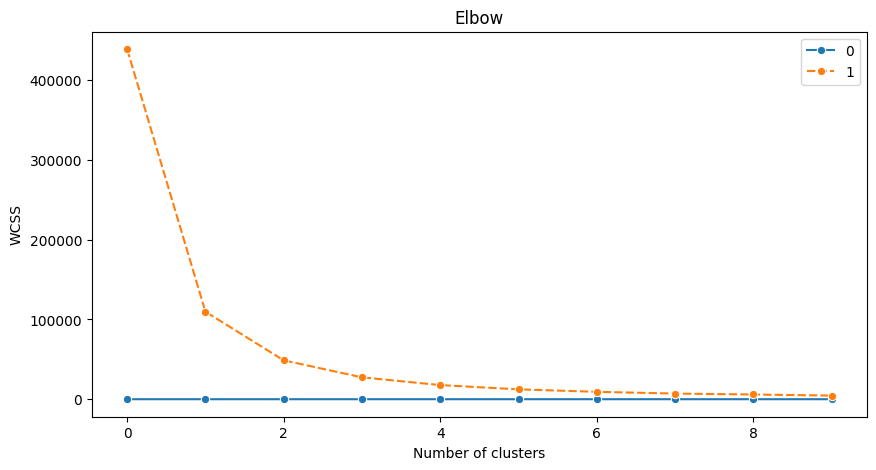

In [22]:
#엘보우 방법을 사용하여 최적의 클러스터 개수를 찾기 위해 클러스터 개수에 따른 클러스터 내 제곱합(WCSS)을 시각화
plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1,11 ), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

최적의 클러스터 개수 찾기
 
그래프를 보았을 때 WCSS가 급격하게 감소하는 지점인 3으로 개수를 지정하겠습니다.

In [23]:
# k-means 모델 정의 및 학습
kmeans = KMeans(n_clusters=3, random_state=174)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=174)

In [24]:
# 클러스터 할당 확인
labels = kmeans.labels_

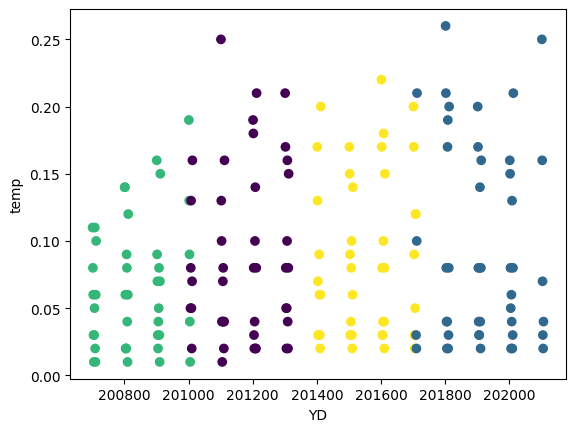

In [25]:
#데이터를 클러스터링, 시각화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['YD'],df['temp'],c = labels)
plt.xlabel('YD')
plt.ylabel('temp')
plt.show()

결과해석)
3개의 군집으로 나눈 결과입니다.temp는 기온효과, YD는 날짜입니다.
군집을 보았을 때 발전량에 영향을 미친 값인 temp(기온효과)가 0.10 근처 값의 분포, 밀집이 줄어들고 0.10을 기준으로 잡았을 때 위 아래로 양극화되는 것이 보입니다.
또한 기온효과가 큰쪽으로 밀집되고 있는 것이 보입니다.
지구온난화로 인해 겨울을 더욱 추워지고 여름은 더욱 더워지는 이상기후로 인해 계절에 따른
가스발전량의 양극화가 나타나는것으로 보입니다.
지구온난화로 인한 기후변화가 발전량에 영향을 준 것을 확인할 수 있었습니다.


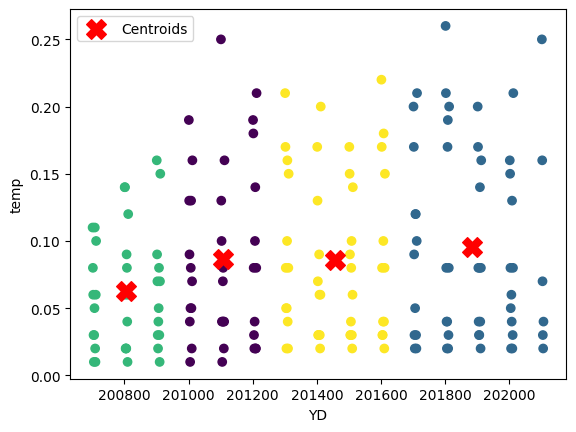

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df = pd.read_csv('한국가스공사_총발전량 월별 기온효과_20210630.csv',encoding='cp949')

# 클러스터링
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['YD', 'temp']])  # Using YD and temp from the DataFrame df
labels = kmeans.predict(df[['YD', 'temp']])

# 중심점 얻기
centroids = kmeans.cluster_centers_

# 시각화
plt.scatter(df['YD'], df['temp'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')  # 중심점 표시
plt.xlabel('YD')
plt.ylabel('temp')
plt.legend()
plt.show()


클러스터 중심점 분석)
 
2018년도부터 군집의 중심 밀도가 갑작스럽게 없어집니다.
보라색 클러스터는 중심점을 기점으로 점들이 모여있으나 2010~2017년도(노랑,초록군집)까지 어느정도 벌어지는 모습을 보이다가 2018년도의 파란색 군집부터는 눈에 띄게 벌어집니다.

In [27]:
#K-Means 클러스터링 Accuracy score 평가
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 18 out of 174 samples were correctly labeled.
Accuracy score: 0.10


여기서 실루엣 점수가 0.10으로 매우 낮게 나왔으므로 클러스터링 결과가 중간 수준으로 평가됩니다. 서서히 변화하는 기온 특성상 기온효과 또한 수년간의 데이터를 사용하여도 
컴퓨터의 입장에선 아주 커다란 변화를 볼 수 없으므로
클러스터 간의 변화가 뚜렷하지 않은 것이 이유로 보입니다.
